In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV


# 1) Prep Data

In [12]:
# Load labeled data
df = pd.read_csv('../labeled/labeledData.csv').drop(['loc_rowid', 'Unnamed: 0', 'toi'], axis=1)

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")

df.head()

Dataset shape: (2582, 36)

Column names: ['isExoplanet', 'tid', 'ra', 'dec', 'st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmdec', 'st_pmdecerr1', 'st_pmdecerr2', 'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_trandurh', 'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_dist', 'st_disterr1', 'st_disterr2', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_logg', 'st_rad']


,isExoplanet,tid,ra,dec,st_pmra,st_pmraerr1,st_pmraerr2,st_pmdec,st_pmdecerr1,st_pmdecerr2,...,st_tmagerr1,st_tmagerr2,st_dist,st_disterr1,st_disterr2,st_teff,st_tefferr1,st_tefferr2,st_logg,st_rad
0,F,0.025595,0.312370,0.441976,1.0,0.014996,1.0,1.0,0.012594,1.0,...,0.021821,1.0,0.064991,1.0,1.0,0.701740,0.041584,1.0,1.0,0.235035
1,F,0.067247,0.331867,0.290722,1.0,0.008355,1.0,1.0,0.008996,1.0,...,0.011750,1.0,0.075878,1.0,1.0,0.202685,0.015959,1.0,1.0,0.363145
2,F,0.121039,0.295884,0.229987,1.0,0.003428,1.0,1.0,0.003823,1.0,...,0.010071,1.0,0.037440,1.0,1.0,0.152683,0.018787,1.0,1.0,0.072645
3,F,0.144183,0.358118,0.357285,1.0,0.004713,1.0,1.0,0.004948,1.0,...,0.010071,1.0,0.133968,1.0,1.0,0.359782,0.018963,1.0,1.0,0.188159
4,F,0.073676,0.339228,0.335514,1.0,0.006427,1.0,1.0,0.008321,1.0,...,0.026857,1.0,0.545757,1.0,1.0,0.640394,0.013020,1.0,1.0,0.246945


In [13]:
# Separate features and target
X = df.drop('isExoplanet', axis=1)  
y = df['isExoplanet']  

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget distribution:\n{y.value_counts()}")

Features shape: (2582, 35)
Target shape: (2582,)

Target distribution:
isExoplanet
F    1299
P    1283
Name: count, dtype: int64


In [14]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## 2) Train Random Forest Classifier

In [26]:
# gridsearch for parameters
param_grid = {
    'C': [255],
    'gamma': ['scale', 'auto', 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END .....................C=255, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .....................C=255, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .....................C=255, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END .....................C=255, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .....................C=255, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END .................C=255, gamma=scale, kernel=sigmoid; total time=   0.3s
[CV] END .................C=255, gamma=scale, kernel=sigmoid; total time=   0.3s
[CV] END .................C=255, gamma=scale, kernel=sigmoid; total time=   0.3s
[CV] END .................C=255, gamma=scale, kernel=sigmoid; total time=   0.3s
[CV] END .................C=255, gamma=scale, kernel=sigmoid; total time=   0.3s
[CV] END ......................C=255, gamma=auto, kernel=rbf; total time=   0.4s
[CV] END ....................C=255, gamma=scale,

In [27]:
svm = SVC(
    kernel = 'poly',
    C = 225,
    gamma='scale',
    probability=True,
    random_state=42
)

svm.fit(X_train, y_train)

,C,225
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [28]:
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:")
print(f"\nMean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation Scores:

Mean Accuracy: 0.8489
Standard Deviation: 0.0105


In [29]:
#predict
y_pred = svm.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.8433

Classification Report:
              precision    recall  f1-score   support

           F       0.87      0.81      0.84       260
           P       0.82      0.88      0.85       257

    accuracy                           0.84       517
   macro avg       0.84      0.84      0.84       517
weighted avg       0.84      0.84      0.84       517



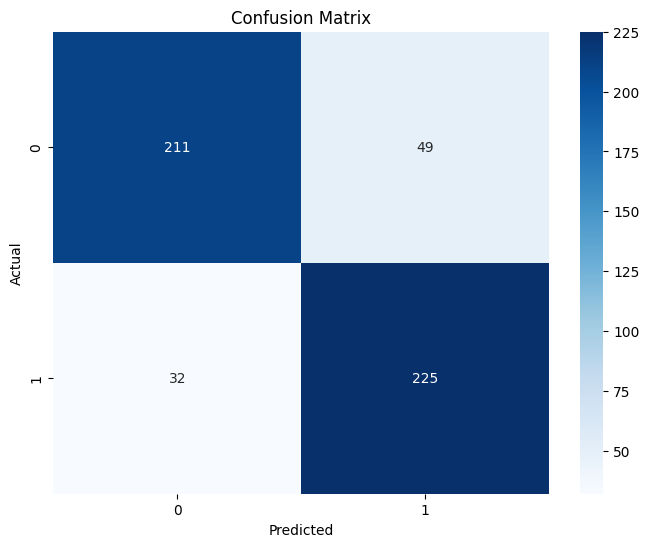

In [32]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [33]:
# Get feature importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': svm.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

AttributeError: 'SVC' object has no attribute 'feature_importances_'